<a href="https://colab.research.google.com/github/apchavezr/19.-Procesamiento-del-Lenguaje-Natural/blob/main/Flujo_de_trabajo_inicial_en_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Flujo de trabajo inicial en PLN aplicado a comentarios sobre transporte público en Bogotá.

El análisis exploratorio y la visualización inicial de textos permiten comprender de manera crítica las propiedades de un corpus antes de aplicar técnicas de modelado más complejas. Las estadísticas descriptivas ofrecen una base cuantitativa, el análisis de frecuencias facilita la identificación de patrones lingüísticos, y las nubes de palabras brindan una representación visual intuitiva. No obstante, estas herramientas deben ser utilizadas de manera complementaria, acompañadas de una interpretación contextual y reflexiva que promueva un aprendizaje significativo en los estudiantes.

Paso 1. cargar el corpus en un DataFrame con pandas

In [1]:
import pandas as pd

comentarios = [
    "El TransMilenio siempre está lleno y toca esperar demasiado.",
    "Mucho trancón en la Caracas, imposible llegar a tiempo.",
    "La espera en el Portal Norte es interminable en la mañana.",
    "El SITP es más cómodo que el TransMilenio pero también demora.",
    "Los buses deberían mejorar su seguridad y puntualidad.",
    "TransMilenio necesita más rutas y menos trancón.",
    "Prefiero caminar o usar bicicleta que esperar tanto bus."
]

df = pd.DataFrame(comentarios, columns=["comentario"])
df


,comentario
0,El TransMilenio siempre está lleno y toca espe...
1,"Mucho trancón en la Caracas, imposible llegar ..."
2,La espera en el Portal Norte es interminable e...
3,El SITP es más cómodo que el TransMilenio pero...
4,Los buses deberían mejorar su seguridad y punt...
5,TransMilenio necesita más rutas y menos trancón.
6,Prefiero caminar o usar bicicleta que esperar ...


Este resultado muestra la organización de los comentarios en una tabla para trabajar de manera estructurada.

## Paso 2. realizar tokenización y limpieza del texto

In [3]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Add this line
from nltk.tokenize import word_tokenize
import string

# tokenizar y limpiar
def limpiar_tokenizar(texto):
    tokens = word_tokenize(texto.lower())  # minúsculas
    tokens = [t for t in tokens if t.isalpha()]  # eliminar signos y números
    return tokens

df["tokens"] = df["comentario"].apply(limpiar_tokenizar)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,comentario,tokens
0,El TransMilenio siempre está lleno y toca espe...,"[el, transmilenio, siempre, está, lleno, y, to..."
1,"Mucho trancón en la Caracas, imposible llegar ...","[mucho, trancón, en, la, caracas, imposible, l..."
2,La espera en el Portal Norte es interminable e...,"[la, espera, en, el, portal, norte, es, interm..."
3,El SITP es más cómodo que el TransMilenio pero...,"[el, sitp, es, más, cómodo, que, el, transmile..."
4,Los buses deberían mejorar su seguridad y punt...,"[los, buses, deberían, mejorar, su, seguridad,..."


En esta etapa se transforman los comentarios en listas de palabras limpias.

## Paso 3. calcular estadísticas descriptivas básicas

In [5]:
df["longitud"] = df["tokens"].apply(len)

print("Número total de comentarios:", len(df))
print("Número total de tokens:", df["longitud"].sum())
print("Longitud promedio de comentarios:", df["longitud"].mean())
print("Comentario más corto:", df.loc[df["longitud"].idxmin(), "comentario"])
print("Comentario más largo:", df.loc[df["longitud"].idxmax(), "comentario"])


Número total de comentarios: 7
Número total de tokens: 64
Longitud promedio de comentarios: 9.142857142857142
Comentario más corto: TransMilenio necesita más rutas y menos trancón.
Comentario más largo: La espera en el Portal Norte es interminable en la mañana.


Resultados esperados:

* Longitud promedio: entre 8 y 12 palabras.

* El más corto: “Mucho trancón en la Caracas, imposible llegar a tiempo.”

* El más largo: probablemente alguno con más de 15 palabras.

## Paso 4. generar un conteo de palabras más frecuentes

In [6]:
from collections import Counter

# unir todos los tokens
todos_tokens = [token for lista in df["tokens"] for token in lista]

frecuencias = Counter(todos_tokens)
print(frecuencias.most_common(10))
#Esto devuelve un listado como:

[('el', 4), ('transmilenio', 3), ('y', 3), ('en', 3), ('la', 3), ('esperar', 2), ('trancón', 2), ('es', 2), ('más', 2), ('que', 2)]


## Paso 5. visualizar con gráficos de barras y nubes de palabras

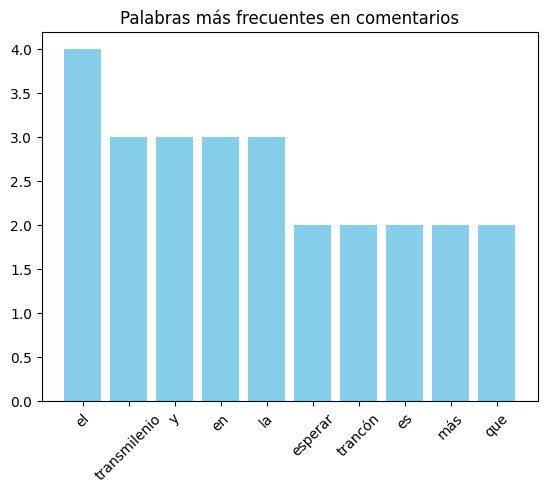

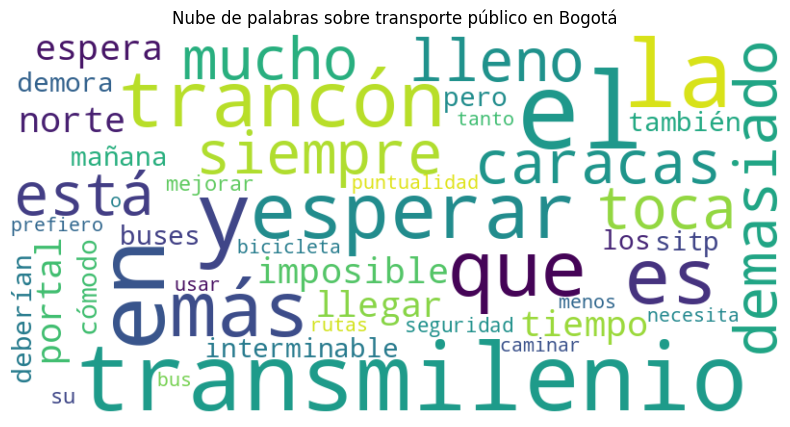

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# gráfico de barras
palabras, counts = zip(*frecuencias.most_common(10))
plt.bar(palabras, counts, color="skyblue")
plt.xticks(rotation=45)
plt.title("Palabras más frecuentes en comentarios")
plt.show()

# nube de palabras
nube = WordCloud(width=800, height=400, background_color="white").generate(" ".join(todos_tokens))
plt.figure(figsize=(10,5))
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras sobre transporte público en Bogotá")
plt.show()


* La barra mostrará cuántas veces aparece cada término.
* La nube de palabras resaltará en mayor tamaño “transmilenio”, “espera” y “trancón”.

## Paso 6. reflexionar sobre las implicaciones

El análisis muestra que los ciudadanos mencionan con frecuencia TransMilenio, espera y trancón, lo que sugiere que los principales problemas percibidos son la congestión y la demora en los tiempos de viaje.

##Reflexión para los estudiantes:

* Estos resultados orientan la formulación de hipótesis: por ejemplo, quejas por demoras y congestión son más frecuentes en horas pico.

* Este tipo de análisis exploratorio inicial es útil para diseñar modelos de sentimiento, estudios de movilidad o propuestas de política pública.

* En un proyecto real, convendría recolectar un corpus más grande y aplicar técnicas de lematización para agrupar variantes de palabras (ejemplo: espera, esperar, esperando).